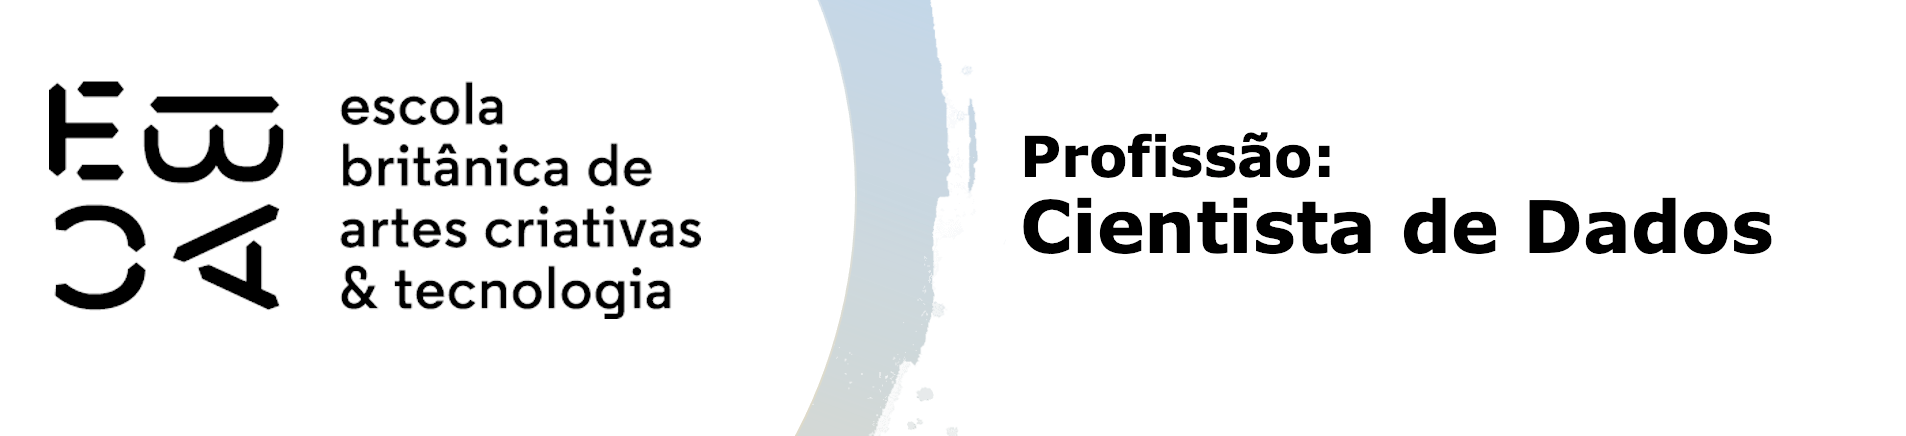

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

%reload_ext watermark
%watermark -iv -v -p sklearn

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

sklearn: 1.3.2

scipy     : 1.11.4
matplotlib: 3.8.2
seaborn   : 0.13.0
pandas    : 2.1.3



## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
# Lendo dataset 'penguins' do seaborn.
peng = sns.load_dataset('penguins')

# Definindo nome do index como 'id'.
peng.index.name='id'

# Extraindo somente variáveis quantitativas dataset e retirando as variaveis vazias (na).
peng_num = peng.select_dtypes('number').dropna()

# Padronizando as variáveis numéricas.
peng_pad = pd.DataFrame(StandardScaler().fit_transform(peng_num), columns=peng_num.columns)

# Agrupamento hierárquico dividindo essa base em 3 grupos.
clus = AgglomerativeClustering(linkage            = 'complete',
                               distance_threshold = None,
                               n_clusters         = 3).fit(peng_pad)

peng_pad

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
337,0.601305,-1.750171,0.931890,0.903175
338,0.527932,-1.445897,1.003109,0.809516
339,1.188289,-0.735923,1.501644,1.933419
340,0.234440,-1.192335,0.789451,1.246590


In [3]:
# Acrescentando a variável 'grupo' no dataframe 'peng_num'.
peng_num['grupo'] = clus.labels_
peng_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0
340,46.8,14.3,215.0,4850.0,0
341,50.4,15.7,222.0,5750.0,0


In [4]:
# Acrescentando a variável 'grupo' no dataframe 'peng'.
peng = peng.merge(peng_num['grupo'], how='left', on='id')
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0.0


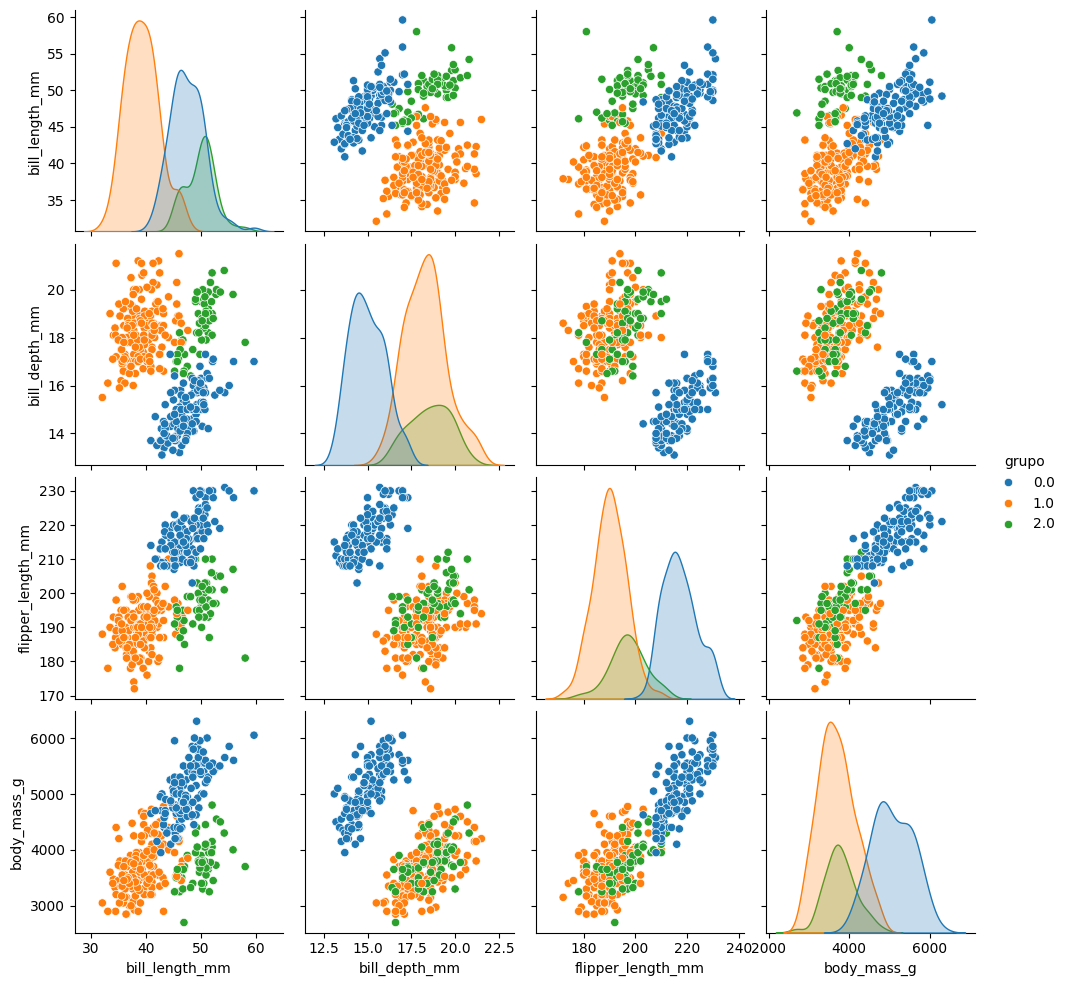

In [5]:
sns.pairplot(data=peng, hue='grupo', palette="tab10")

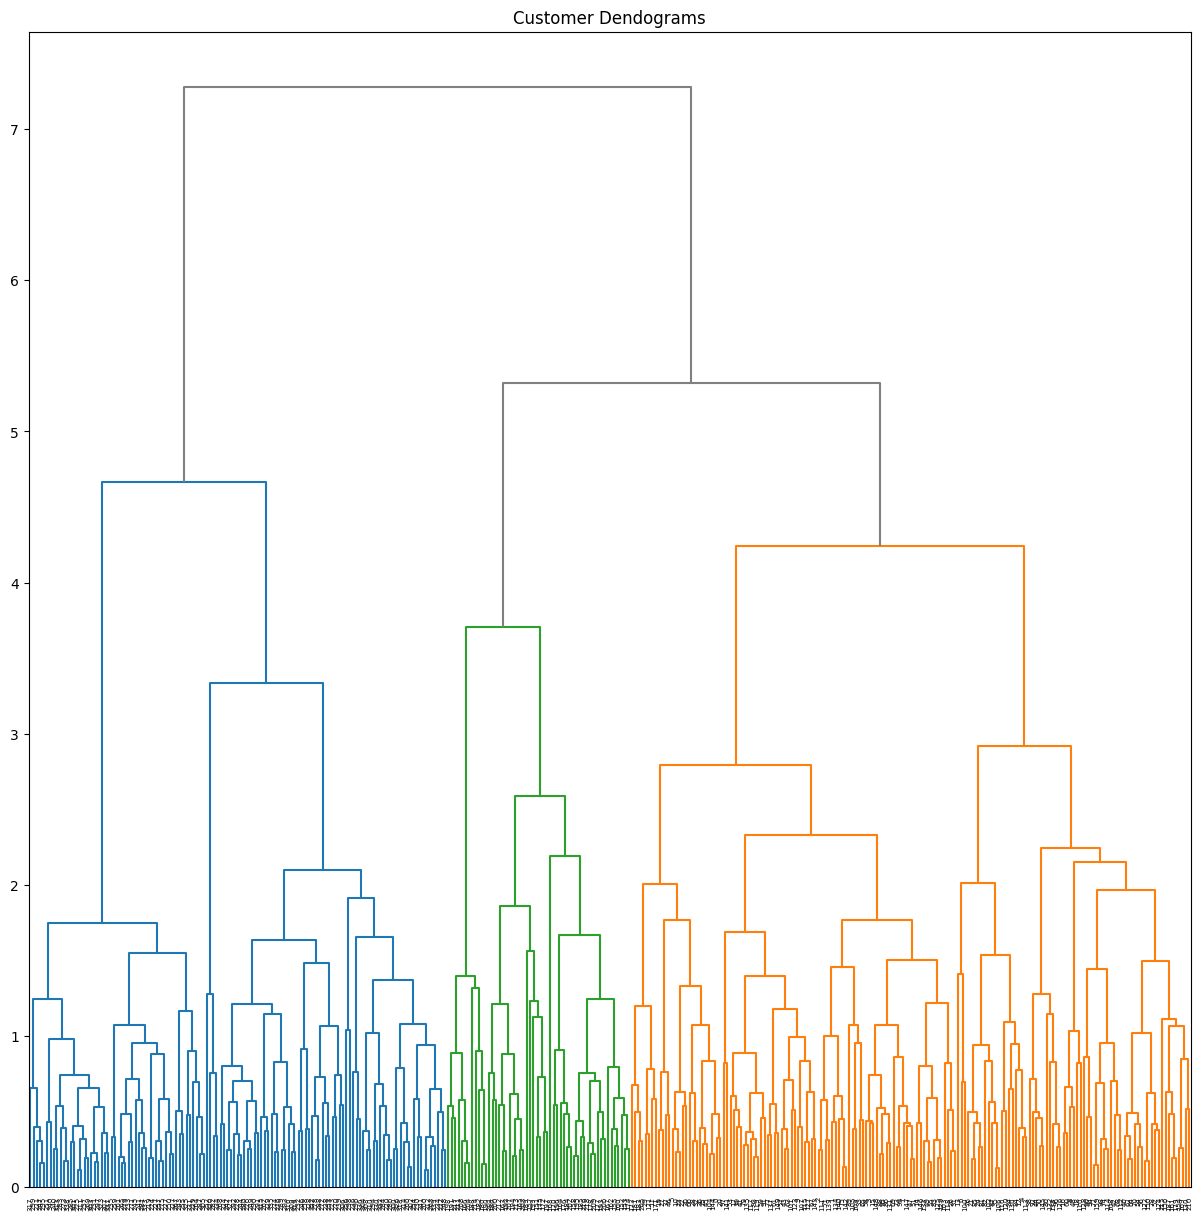

In [6]:
plt.figure(figsize=(15, 15))

plt.title("Customer Dendograms")
shc.set_link_color_palette(['#1F77B4','#2CA02C', '#FF7F0E'])
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'), above_threshold_color='grey')

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [184]:
pd.crosstab(peng['species'],
            peng['grupo'],
            margins=True,
            margins_name= 'Total')

grupo,0.0,1.0,2.0,Total
species,,,,
Adelie,0,151,0,151
Chinstrap,0,14,54,68
Gentoo,123,0,0,123
Total,123,165,54,342


In [185]:
pd.crosstab(peng['species'],
            peng['grupo'],
            normalize='columns').round(4)*100

grupo,0.0,1.0,2.0
species,,,
Adelie,0.0,91.52,0.0
Chinstrap,0.0,8.48,100.0
Gentoo,100.0,0.00,0.0


In [232]:
peng.query("species=='Chinstrap' and grupo==1")['species', 'grupo', sex]

id
155    Chinstrap
157    Chinstrap
160    Chinstrap
162    Chinstrap
170    Chinstrap
172    Chinstrap
174    Chinstrap
180    Chinstrap
182    Chinstrap
184    Chinstrap
188    Chinstrap
206    Chinstrap
211    Chinstrap
216    Chinstrap
Name: species, dtype: object

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?